# Heart Disease Diagnostic Analysis

In [1]:
#Import python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\amitk\Downloads\Heart Disease data.csv")  #read the data 

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape #rows and columns

(1025, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.nunique() #unique values in data as per columns

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
data.isnull().sum() #null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null value in this data, so we can proceed with the Exploratory Data Analysis part. 

# Exploratory Data Analysis

[Text(0, 0, '312'), Text(0, 0, '713')]

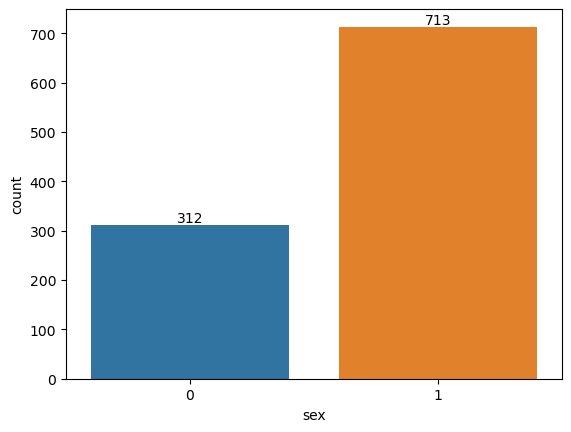

In [8]:
#Gender wise count 
graph=sns.countplot(x='sex', data=data)
graph.bar_label(graph.containers[0], fontsize=10)

Males are almost double the number of females.

(array([  0.,   0.,   4.,  53., 237., 422., 275.,  34.,   0.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <BarContainer object of 9 artists>)

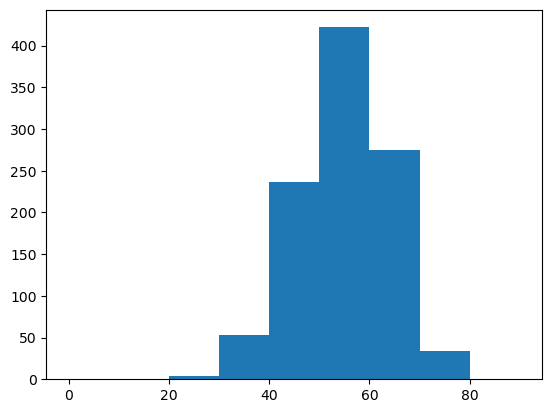

In [9]:
#Normal distribution of the Age of the people
plt.hist(data['age'], bins=np.arange(0,100,10))

Age group 50–60 years got more heart disease diagnoses compared to others. 

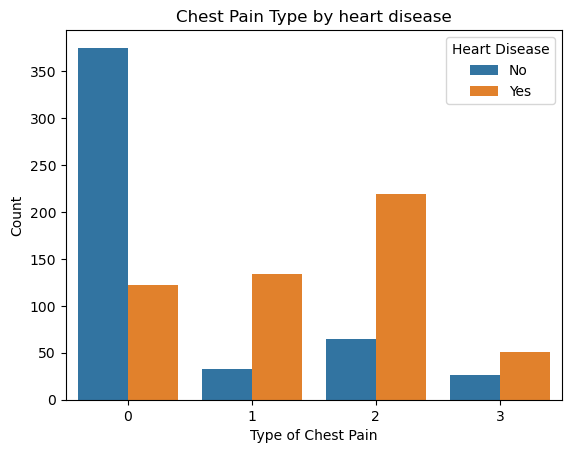

In [10]:
#Chest Pain Type by heart Disease
sns.countplot(x='cp',data=data, hue='target')
plt.title('Chest Pain Type by heart disease')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Value 0: typical angina ,Value 1: atypical angina, Value 2: non-anginal pain , Value 3: asymptomatic

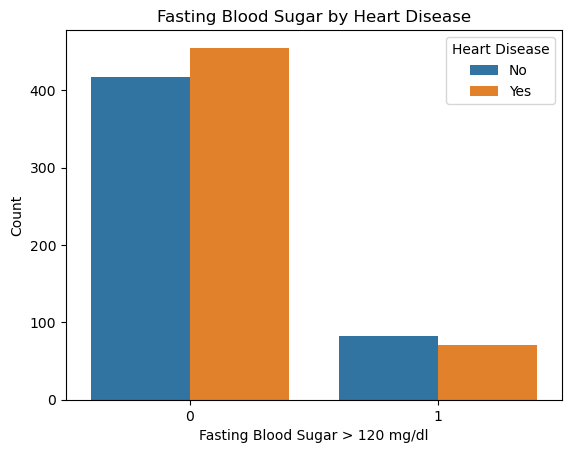

In [11]:
# Visualize Fasting Blood Sugar by Heart Disease
sns.countplot(x='fbs', hue='target', data=data)
plt.title('Fasting Blood Sugar by Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [22]:
data[['age', 'trestbps', 'chol', 'thalach']].describe() #Statistical analysis of some numerical columns

,age,trestbps,chol,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146
std,9.072290,17.516718,51.59251,23.005724
min,29.000000,94.000000,126.00000,71.000000
25%,48.000000,120.000000,211.00000,132.000000
50%,56.000000,130.000000,240.00000,152.000000
75%,61.000000,140.000000,275.00000,166.000000
max,77.000000,200.000000,564.00000,202.000000


The mean values of Age, BP, cholesterol, and maximum heart rate are 54, 132, 246 and 149. 
The average cholesterol level is 246 mg/dL, ranging from 126 to 564 mg/dl.
The maximum heart rate averages 149.1 bpm (beats per minute), ranging from 71 to 202 bpm.

In [13]:
#there is no data below the 20 years and above the 80 years of age
age_bins = [20, 40, 60, 80] 
age_labels = ['21-40', '41-60', '61-80']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
data['age_group']

0       41-60
1       41-60
2       61-80
3       61-80
4       61-80
        ...  
1020    41-60
1021    61-80
1022    41-60
1023    41-60
1024    41-60
Name: age_group, Length: 1025, dtype: category
Categories (3, object): ['21-40' < '41-60' < '61-80']

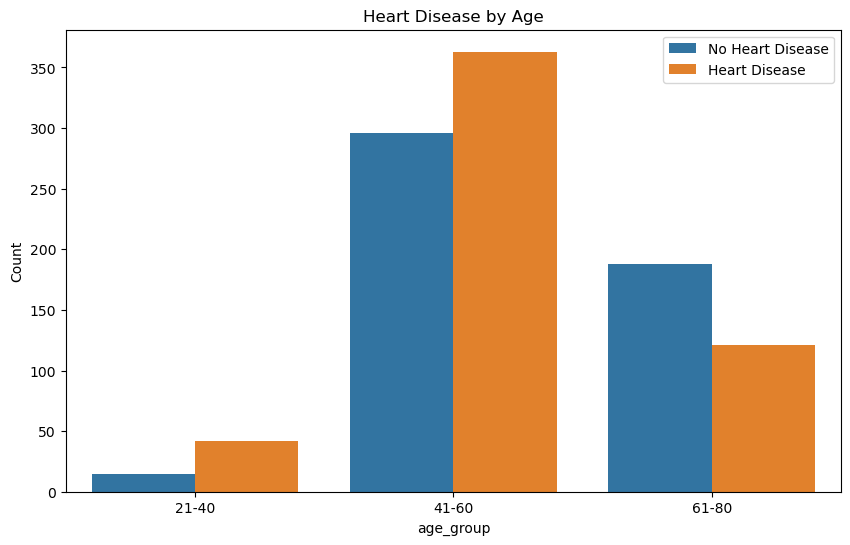

In [14]:
# Heart disease diagnosis according to age
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='target', data=data)
plt.title('Heart Disease by Age')
plt.xlabel('age_group')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

Age groups 41-60 have the highest number of people with heart disease diagnoses, around 350. The age group 21-40 years has the lowest prevalence of heart disease among the groups. 

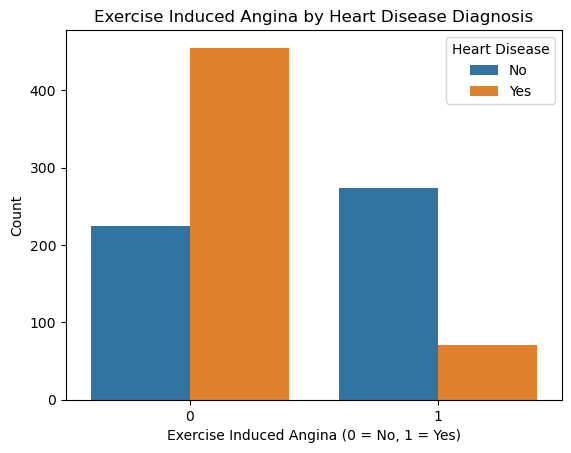

In [15]:
# Visualize Exercise Induced Angina by Heart Disease
sns.countplot(x='exang', data=data, hue='target')
plt.title('Exercise Induced Angina by Heart Disease Diagnosis')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Most of the numbers of people (450 people) are who got heart disease but not include the angina.

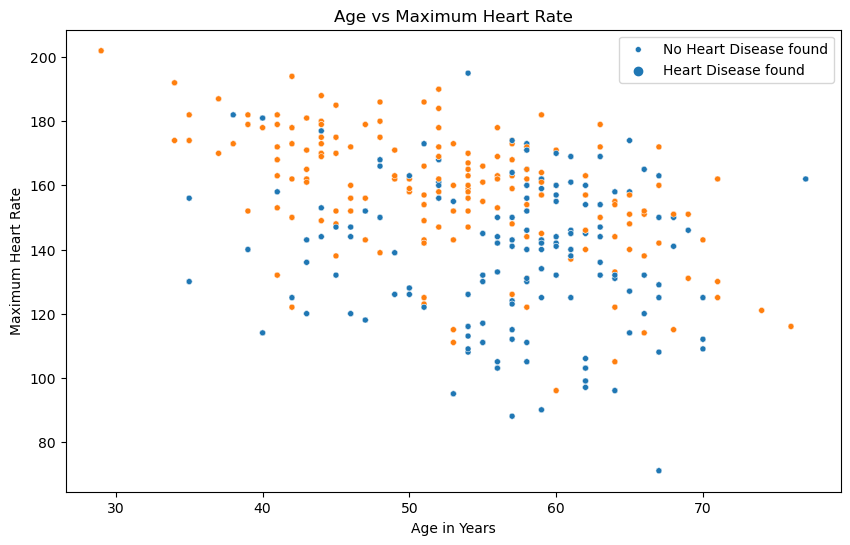

In [16]:
# Scatter plot of maximum heart rate and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=data, hue='target', size=5, )
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age in Years')
plt.ylabel('Maximum Heart Rate')
plt.legend(['No Heart Disease found', 'Heart Disease found'])
#plt.show()

Individuals with heart disease tend to have lower maximum heart rates as they age compared to those without heart disease.

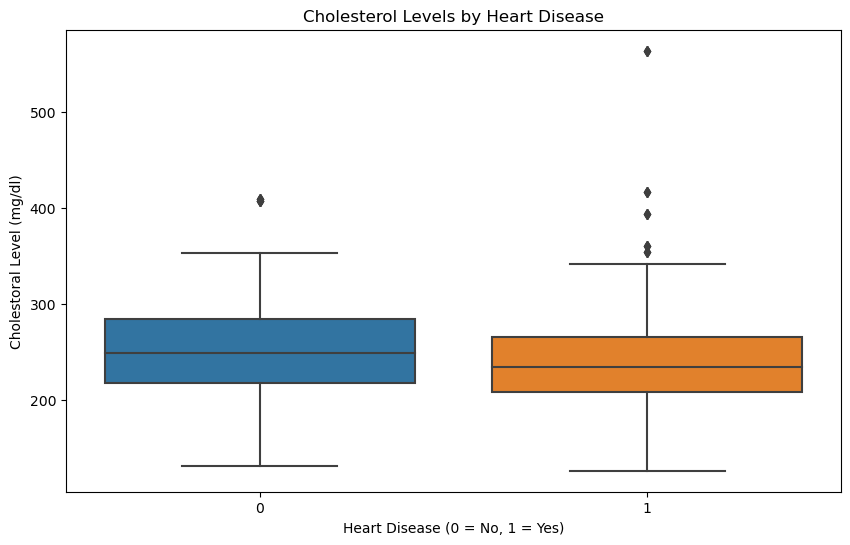

In [17]:
#Heart Disease vs Cholestrol
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholestoral Level (mg/dl)')
plt.show()

Median cholesterol levels are higher in individuals with heart disease compared to those without, indicating cholesterol levels may influence heart disease risk.

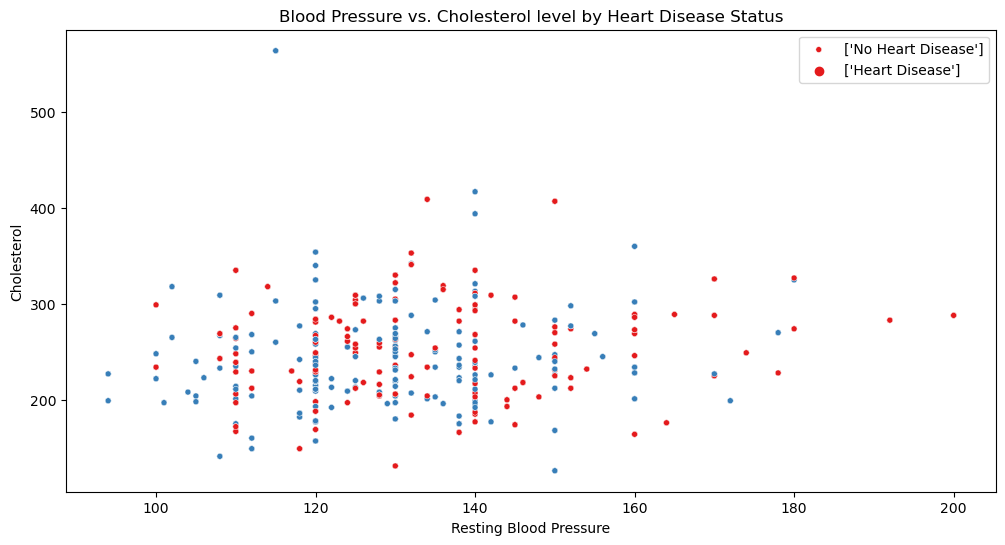

In [18]:
#Blood Pressure vs Cholestrol level
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trestbps', y='chol', hue='target', data=data, size=5, palette='Set1')
plt.title('Blood Pressure vs. Cholesterol level by Heart Disease Status')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend([['No Heart Disease'], ['Heart Disease']])
plt.show()

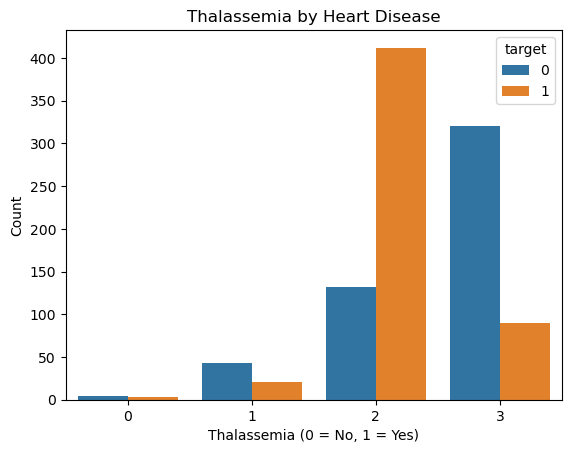

In [19]:
# Thalassemia by Heart Disease data
sns.countplot(x='thal', hue='target', data=data)
plt.title('Thalassemia by Heart Disease')
plt.xlabel('Thalassemia (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

People with 'reversible defect' or 'fixed defect' thalassemia types are more likely to have heart disease. 'Normal' thalassemia type individuals show a lower incidence of heart disease. Those where thalassemia was 'not found' have a mixed but generally lower prevalence of heart disease.

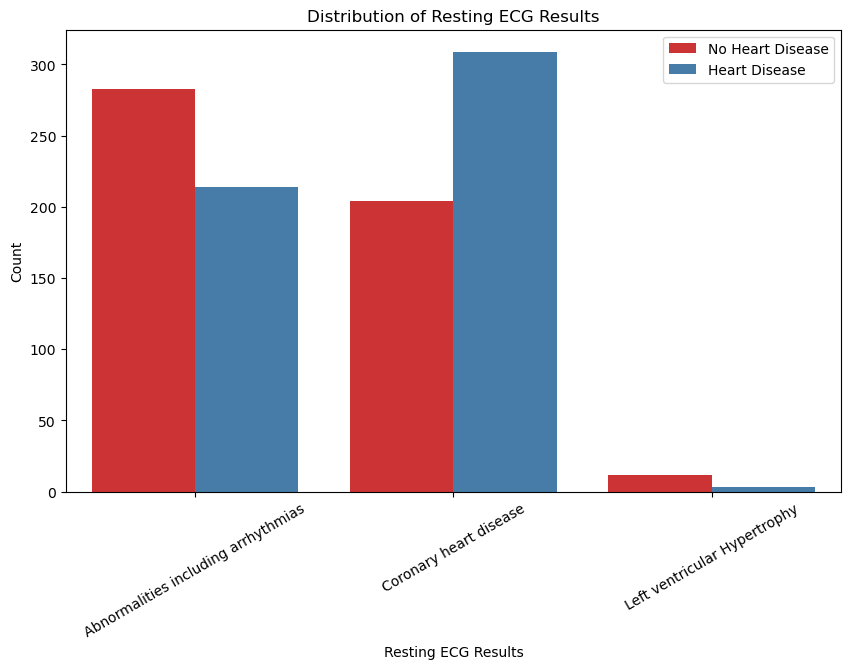

In [20]:
#Distribution of Resting ECG Results
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='restecg', hue='target', palette='Set1')
plt.title('Distribution of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.xticks(ticks=[0, 1, 2], labels=['Abnormalities including arrhythmias', 'Coronary heart disease', 
                                    'Left ventricular Hypertrophy'])
plt.xticks(rotation=30)
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

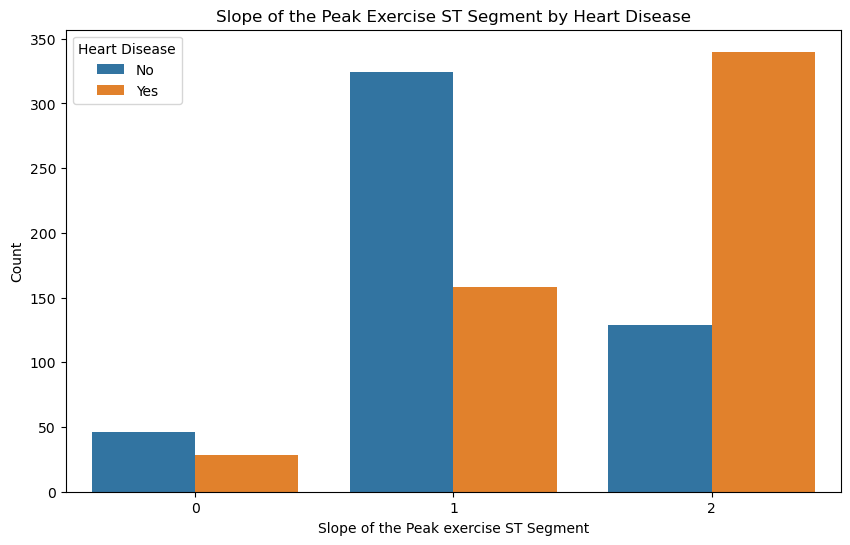

In [21]:
# Visualize Slope of the Peak Exercise ST Segment by Heart Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', hue='target', data=data)
plt.title('Slope of the Peak Exercise ST Segment by Heart Disease')
plt.xlabel('Slope of the Peak exercise ST Segment')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

0=Up slope, 1=Flat(slop=0), 2=Down slope

'Flat' and 'upsloping' slopes show varying prevalence, with 'upsloping' generally having a lower association with heart disease. The 'downsloping' slope of the peak exercise ST segment is associated with a higher prevalence of heart disease.

# Attribute Information:

1. age
2. sex
3. chest pain type (4 values) - Value 1: typical angina ,Value 2: atypical angina, 
Value 3: non-anginal pain , Value 4: asymptomatic.
4. resting blood pressure -  120/80 mmHg
5. serum cholesterol in mg/dl - represents the amount of total cholesterol in their blood.
6. fasting blood sugar > 120 mg/dl - common blood test to diagnose prediabetes, diabetes or gestational diabetes.
7. resting electrocardiographic results (values 0,1,2) - test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.
8. maximum heart rate achieved - Thalach
9. exercise induced angina - pain in the chest that comes on with exercise, stress, or other things that make the heart work harder
10. oldpeak = ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy , CA- Coronary artery disease
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
